# Lab 8: Nonlinear ODEs
## BIOS 26210 (fall 2022)

## Keegan Ballantyne

In [6]:
#Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities
from scipy.optimize import fsolve # for solving nonlinear equations
from scipy.integrate import odeint # function for solving ODEs

### Assignment Overview:

In this lab, we will *linearize* nonlinear systems of ODEs and classify the dynamics near the fixed points. To do this, we use the Jacobian matrix of the ODE functions to approximate the dynamics of the nonlinear system in the neighborhood of a fixed point. This allows us to classify the flow around the fixed point using the eigenvalues of the Jacobian.

The main objective from a programming perspective is to utilize functions to make your code efficient and flexible for handling an arbitrary two-variable ODE. You will do the following:

1. Define functions to return the defining function and the Jacobian matrix of a particular ODE model.

2. Use the first function to create phase portraits of ODEs, and add plots of nullclines on top;

3. Use the Jacobian matrix function to calculate eigenvalues for different fixed points and classify them.

See below for detailed instructions for each task.


## Part 1: Lotka-Volterra predator-prey model


Assume the prey grows without bound without the predator, and the predators die without the prey. The interaction of predators and prey has a positive effect on the predators, and a negative effect on the prey:

$$   
 \frac{dP}{dt} = -aP + bPR \\
 \frac{dR}{dt} = cR - dPR 
$$


### 1.1 

Calculate the Jacobian matrix for the ODE on paper, keeping the parameters as letters, so that any parameter values can be plugged in. Then define functions in python to do the following:

    a) the defining function for this ODEs, with the variables as one vector input argument and the parameters as separate inputs, and returns the vector of derivatives as an array
        
    b) the Jacobian matrix for this ODE, with the variables as one vector input argument and the parameters as separate inputs, and returns the Jacobian matrix as a matrix array
      

In [9]:
# P = number of predators
# R = number of prey
# PR = variable for ode function = t

# The extra t argument that is necessary for the numeric solver
def ode_func(x,t,a,b,c,d):
    """defines a ODE function"""
    return [-d*x[0]+a*x[0]*x[1], 
            c*x[1]-b*x[0]*x[1]]

In [10]:
def ode_jac(x,a,b,c,d): # function that defines the Jacobian
    """Solves for the Jacobian matrix given a fixed point"""
    return np.array([[-d+a*x[1], a*x[0]],
                     [-b*x[1], c-b*x[0]]])

In [35]:
# Take parameters to create grid mesh
# 0 is a place holder for t

def def_func(a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, xinit, yinit):
    # Create phase plane
    X = np.arange(xmin, xmax, dx)
    Y = np.arange(ymin, ymax, dy)
    # creates the vector field
    x,y = np.meshgrid(X,Y)
    
    # calculate numeric solution of ODE defined in fun
    dXY = ode_func([x,y], 0, a, b, c, d)
    
    fig, ax=plt.subplots()
    ax.quiver(x, y, dXY[0], dXY[1])
    plt.xlim(xmin,xmax)
    plt.ylim(ymin, ymax)
    
    # Create the nullclines
    Pnull = (a/b)+x*0 # X-nullcline using the Y vector from above
    plt.plot(Pnull, y, 'r') # plot the X-nullcline
    Rnull = (c/d)+y*0 # Y-nullcline using the X vector from above
    plt.plot(x, Rnull, 'b') # plot the Y-nullcline
    
    # Define the fixed point vectors 
    Xfp = [0, (a/b)]
    Yfp = [0, (c/d)]
    
    # Solve for eigenvalues/vectors of the Jacobian matrix
    A = ODE_jac([x,y],a,b,c,d) 
    evals, evecs = np.linalg.eig(A)
    print('eigen vals=', evals[0], evals[1])
    print('eigen vecs=', evecs[0], evecs[1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title('Phase Plane')
    
    for i in range(len(xinit)):
        
        init = [xinit[i], yinit[i]] #[intial x, initial y]
        t = np.arange(0, Tmax, dt) # create time vector 
        sol = odeint(ode_func, init, t, args=(a, b, c, d)) # calculate numeric solution of ODE defined in fun
        
        ax.plot(sol[:,0], sol[:,1])
    
    # plot the fixed points as large circles
    plt.plot(Xfp, Yfp, color = "magenta", marker = "o", linestyle = 'None', markersize = 10.0)
    
    # Overall plot labels
    plt.xlabel('X') 
    plt.ylabel('Y')
    plt.title('Model')
    
    plt.show()
    
    return

### 1.2. 
Calculate the nullclines of the ODE on paper (keeping the parameters as letters so that any parameter values can be plugged in). Write python code to produce vectors for the two variables for each nullcline and plot them over some ranges of P and R that include all intersections between the nullclines. Calculate the values of the fixed points, either using an exact solution on paper, or using a numeric solver as show in the linearization_examples notebook. Add the fixed points using a large point, e.g. using plot at the individual fixed points with options: `color = "magenta", marker = "o", linestyle = 'None', markersize = 10.0`. Use the following parameter values and make plots of the nullclines and fixed points: $c=2; d=5; a=0.5; b=0.4$. Self-check: at the intersection of nullclines should be two fixed points, at $(0,0)$ and $(5,10)$.

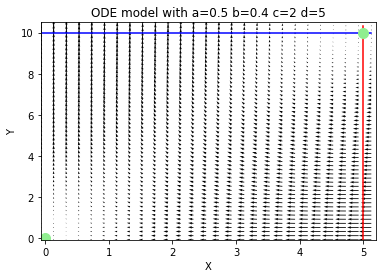

In [85]:
# set the model parameters
a=0.5
b=0.4
c=2
d=5

xmin = -0.07 #change the parameters here to control the range of the axes
xmax = 5.2
ymin = -0.07
ymax = 10.5

dx = 0.2 #set the size of the x-step on the grid
dy = 0.2 #set the size of the y-step on the grid
X = np.arange(xmin, xmax, dx) # vector of X variables
Y = np.arange(ymin, ymax, dy) # vector of Y variables
x, y = np.meshgrid(X, Y) #create a grid

dXY = ode_func([x,y], 0, a, b, c, d) # we set the t variable to zero here

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
ax.quiver(x, y, dXY[0], dXY[1])
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# create nullclines
Xnull = np.repeat(c/b, len(Y)) # X-nullcline using the Y vector from above
plt.plot(Xnull, Y, 'r') # plot the X-nullcline
Ynull = np.repeat(d/a, len(X)) # Y-nullcline using the X vector from above
plt.plot(X, Ynull, 'b') # plot the Y-nullcline

# define the fixed point vectors
Xfixed = [0, c/b]
Yfixed = [0 ,d/a]

# plot the fixed points as large circles
plt.plot(Xfixed, Yfixed, color = "lightgreen", marker = "o", linestyle = 'None', markersize = 10.0)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('ODE model with a=' +str(a)+' b='+str(b)+' c='+str(c)+' d='+str(d))
plt.show()

### 1.3. 
Create a function based on a similar function from lab 6 part 2, that does the following:

 * INPUTS: P and R limits of the phase plane, grid spacing for P and R, parameters of L-V model, Tmax, dt, vector of x initial values, vector of y initial values
 * DO: 
     - create a phase portrait of the 2-variable ODE
     - draw nulllclines and fixed points as you did in question 2
     - overlay solution trajectories starting from given initial values over the phase plane (by calling the ODE defining function you created in question 1)
 * OUTPUT: No variables to return

Choose P and R limits for the phase portrait to include all of the fixed points you found, and generate several (2-4) solutions to illustrate the dynamics. Use the function you created with the following parameter values:

    a) c=2; d=5; a=0.5; b=0.4
    b) c=10; d=5; a=0.5; b=0.4


In [88]:
#defining the function
def model_func(xlim,ylim,dx,dy,a,b,c,d,tmax,dt,Xinit,Yinit):
    X = np.arange(xlim[0], xlim[1], dx) # vector of X variables
    Y = np.arange(ylim[0], ylim[1], dy) # vector of Y variables
    x, y = np.meshgrid(X, Y) #create a grid
    dXY = ode_func([x,y], 0, a, b, c, d) # we set the t variable to zero here
    
    #Then plot the arrows given by arrays dx,dy at points x,y:
    fig, ax = plt.subplots()
    ax.quiver(x, y, dXY[0], dXY[1])
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    
    # create nullclines
    Xnull = np.repeat(c/b, len(Y)) # X-nullcline using the Y vector from above
    plt.plot(Xnull, Y, 'r') # plot the X-nullcline
    Ynull = np.repeat(d/a, len(X)) # Y-nullcline using the X vector from above
    plt.plot(X, Ynull, 'b') # plot the Y-nullcline

    # define the fixed point vectors
    Xfp = [0, c/b]
    Yfp = [0, d/a]
    
    # plot the fixed points as large circles
    plt.plot(Xfp, Yfp, color = "lightgreen", marker = "o", linestyle = 'None', markersize = 10.0)
    for i in np.arange(len(Xinit)):
        # Set different initial values, the vector of times, and call the ODE solver again
        init = [Xinit[i], Yinit[i]] #[intial x, initial y]
        t = np.arange(0, tmax, dt) # create time vector
        sol = odeint(ode_func, init, t, args=(a, b, c, d)) # calculate numeric solution of ODE defined in fun
        
        # Plot the solution...
        plt.plot(sol[:,0], sol[:,1])
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('ODE model with a=' +str(a)+' b='+str(b)+' c='+str(c)+' d='+str(d))
    plt.show()
    
    return



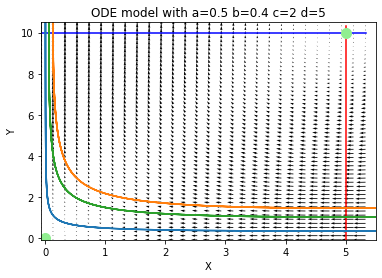

In [89]:
model_func([-0.07, 5.5], [-0.07, 10.5], 0.2, 0.2, 0.5, 0.4, 2, 5, 10, 0.01, [1, 0.5, 1], [0.5, 3, 1.5])


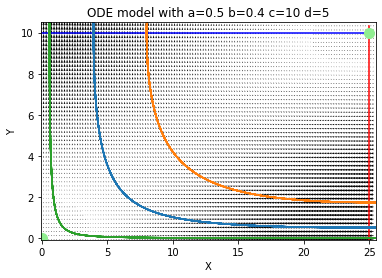

In [90]:
model_func([-0.07, 25.5], [-0.07,10.5], 0.2, 0.2, 0.5, 0.4, 10, 5, 10, 0.01, [4, 8, 1], [8, 10, 1.5])


### 1.4 
Use the Jacobian function from question 1 to calculate the eigenvalues of each fixed point with parameter sets a) and b) from question 3 and classify the local dynamics around each one.

In [91]:
# set the model parameters
a=0.5
b=0.4
c=2
d=5

# define the fixed point vectors
Xfp = [0, c/b]
Yfp = [0 ,d/a]

# for loop to iterate over the number of fixed points
for i in np.arange(len(Xfp)):
    Jac = ODE_jac([Xfp[i], Yfp[i]], a, b,c,d)
    eVals, eVecs = np.linalg.eig(Jac)
    print("Fixed point ("+str(Xfp[i])+', '+str(Yfp[i])+") eigenvalues:"+str((eVals)))



Fixed point (0, 0) eigenvalues:[-5.  2.]
Fixed point (5.0, 10.0) eigenvalues:[0.+3.16227766j 0.-3.16227766j]


In [92]:
# set the model parameters
# set the model parameters
a=0.5
b=0.4
c=10
d=5
# define the fixed point vectors
Xfp = [0, c/b]
Yfp = [0 ,d/a]
# for loop to iterate over the number of fixed points
for i in np.arange(len(Xfp)):
    Jac = ODE_jac([Xfp[i], Yfp[i]], a, b,c,d)
    eVals, eVecs = np.linalg.eig(Jac)
    print("Fixed point ("+str(Xfp[i])+', '+str(Yfp[i])+") eigenvalues:"+str((eVals)))



Fixed point (0, 0) eigenvalues:[-5. 10.]
Fixed point (25.0, 10.0) eigenvalues:[0.+7.07106781j 0.-7.07106781j]


The fixed point at 0 shows a saddle, and the second fixed point shows a center point, which is consistent with what we see.

## Part 2: competition model

Two species (figuratively called sheep and rabbits) occupy the same ecological niche and compete with each other. This is represented by the following model:

$$ 
\frac{dS}{dt} = S(a-S-bR) \\
\frac{dR}{dt} = R(c-R-dS) 
$$


### 2.1 

Calculate the Jacobian matrix for the ODE on paper, keeping the parameters as letters, so that any parameter values can be plugged in. Then define two functions in python to do the following:

    a) the defining function for this ODEs, with the variables as one vector input argument and the parameters as separate inputs, and returns the vector of derivatives as an array
        
    b) the Jacobian matrix for this ODE, with the variables as one vector input argument and the parameters as separate inputs, and returns the Jacobian matrix as a matrix array
      

In [93]:
#defining function
def ode_func2(x,t,a,b,c,d): # function that defines the ODE
# note the extra t argument that is necessary for the numeric solver
    return [x[0]*(a-x[0]-b*x[1]),
            x[1]*(c-x[1]-d*x[0])]

#Jacobian matrix
def ODE_jac2(x,a,b,c,d): # function that defines the Jacobian
    return np.array([[a-b*x[1]-2*x[0], -b*x[0]],
                     [-d*x[1], c-d*x[0]-2*x[1]]])


### 2.2. 
Calculate the nullclines of the ODE on paper (keeping the parameters as letters so that any parameter values can be plugged in). Write python code to produce vectors for the two variables for each nullcline and plot them over some ranges of R and S that include all intersections between the nullclines. Calculate the values of the fixed points, either using an exact solution on paper, or using a numeric solver as show in the code examples notebook. Add the fixed points using a large point, e.g. using plot at the individual fixed points with options: `color = "magenta", marker = "o", linestyle = 'None', markersize = 10.0`. Use the following parameter values and make plots of the nullclines and fixed points: $a=2; b=1; c=3; d=2$. Self-check: at the intersection of nullclines should be four fixed points, at $(0,0)$, $(3,0)$, $(0,2)$ and $(1,1)$.

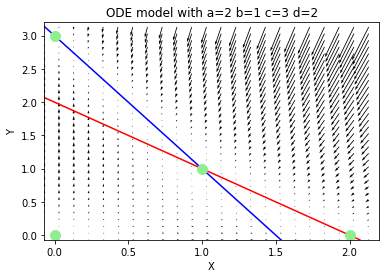

In [94]:
# set the model parameters
a=2
b=1
c=3
d=2

xmin = -0.07 #change the parameters here to control the range of the axes
xmax = 2.2
ymin = -0.07
ymax = 3.2

dx = 0.1 #set the size of the x-step on the grid
dy = 0.1 #set the size of the y-step on the grid

X = np.arange(xmin, xmax, dx) # vector of X variables
Y = np.arange(ymin, ymax, dy) # vector of Y variables
x, y = np.meshgrid(X, Y) #create a grid
dXY = ode_func2([x,y], 0, a, b,c,d) # we set the t variable to zero here

#Then plot the arrows given by arrays dx,dy at points x,y:
fig, ax = plt.subplots()
ax.quiver(x, y, dXY[0], dXY[1])
plt.xlim(xmin,xmax)
plt.ylim(ymin, ymax)

# create nullclines
Xnull = a-b*Y # X-nullcline using the Y vector from above
plt.plot(Xnull, Y, 'r') # plot the X-nullcline
Ynull = c-d*X # Y-nullcline using the X vector from above
plt.plot(X, Ynull, 'b') # plot the Y-nullcline

# define the fixed point vectors
Xfp = [0,0,a,a-b*((d*a-c)/(d*b-1))]
Yfp = [0,c,0,(d*a-c)/(d*b-1)]

# plot the fixed points as large circles
plt.plot(Xfp, Yfp, color = "lightgreen", marker = "o", linestyle = 'None', markersize = 10.0)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('ODE model with a=' +str(a)+' b='+str(b)+' c='+str(c)+' d='+str(d))
plt.show()


### 2.3. 

Create a function based on a similar function from lab 6 part 2, that does the following:

 * INPUTS: S and R limits of the phase plane, grid spacing for S and R, parameters of the competition model, Tmax, dt, vector of x initial values, vector of y initial values
 * DO: 
     - create a phase portrait of the 2-variable ODE
     - draw nulllclines and fixed points as you did in question 2
     - overlay solution trajectories starting from given initial values over the phase plane (by calling the ODE defining function you created in question 1)
 * OUTPUT: No variables to return

Choose S and R limits for the phase portrait to include all of the fixed points you found, and generate several (2-4) solutions to illustrate the dynamics. Use the function you created with the following parameter values:

       a) a=2; b=1; c=3; d=2
       b) a=2; b=0.5; c=3; d=1
       

In [95]:
#defining the function
def comp(xlim,ylim,dx,dy,a,b,c,d,tmax,dt,Xinit,Yinit):
    X = np.arange(xlim[0], xlim[1], dx) # vector of X variables
    Y = np.arange(ylim[0], ylim[1], dy) # vector of Y variables
    x, y = np.meshgrid(X, Y) #create a grid
    dXY = ode_func2([x,y], 0, a, b,c,d) # we set the t variable to zero here
    
    #Then plot the arrows given by arrays dx,dy at points x,y:
    fig, ax = plt.subplots()
    ax.quiver(x, y, dXY[0], dXY[1])
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    
    # create nullclines
    Xnull = a-b*Y # X-nullcline using the Y vector from above
    plt.plot(Xnull, Y, 'r') # plot the X-nullcline
    Ynull = c-d*X # Y-nullcline using the X vector from above
    plt.plot(X, Ynull, 'b') # plot the Y-nullcline
    
    # define the fixed point vectors
    Xfp = [0,0,a,a-b*((d*a-c)/(d*b-1))]
    Yfp = [0,c,0,(d*a-c)/(d*b-1)]
    
    # plot the fixed points as large circles
    plt.plot(Xfp, Yfp, color = "lightgreen", marker = "o", linestyle = 'None', markersize = 10.0)
    
    for j in np.arange(len(Xinit)):
    # Set different initial values, the vector of times, and call the ODE solver again
        init = [Xinit[j], Yinit[j]] #[intial x, initial y]
        t = np.arange(0, tmax, dt) # create time vector
        sol = odeint(ode_func2, init, t, args=(a, b,c,d)) # calculate numeric solution of ODE defined in fun
        
        # Plot the solution...
        plt.plot(sol[:,0], sol[:,1])
        
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('ODE model with a=' +str(a)+' b='+str(b)+' c='+str(c)+' d='+str(d))
    plt.show()
    
    return


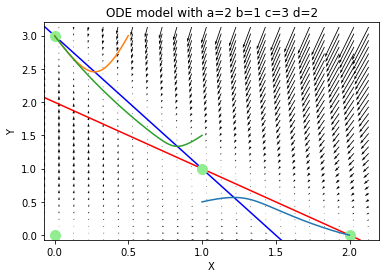

In [96]:
comp([-0.07,2.2],[-0.07,3.2],0.1,0.1,2,1,3,2,10,0.01,[1,0.5, 1],[0.5,3, 1.5])


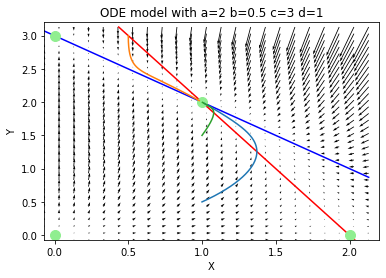

In [97]:
comp([-0.07,2.2],[-0.07,3.2],0.1,0.1,2,0.5,3,1,10,0.01,[1,0.5, 1],[0.5,3, 1.5])


2.4 Use the Jacobian function to calculate the eigenvalues of each fixed point with parameter values a) and b); classify the local dynamics around one.

In [98]:
# set the model parameters
a=2
b=1
c=3
d=2

# define the fixed point vectors
Xfp = [0,0,a,a-b*((d*a-c)/(d*b-1))]
Yfp = [0,c,0,(d*a-c)/(d*b-1)]

# for loop to iterate over the number of fixed points
for i in np.arange(len(Xfp)):
    Jac = ODE_jac2([Xfp[i], Yfp[i]], a, b,c,d)
    eVals, eVecs = np.linalg.eig(Jac)
    print("Fixed point ("+str(Xfp[i])+', '+str(Yfp[i])+") eigenvalues:"+str((eVals)))


Fixed point (0, 0) eigenvalues:[2. 3.]
Fixed point (0, 3) eigenvalues:[-3. -1.]
Fixed point (2, 0) eigenvalues:[-2. -1.]
Fixed point (1.0, 1.0) eigenvalues:[ 0.41421356 -2.41421356]


In [99]:
# set the model parameters
a=2
b=0.5
c=3
d=1

# define the fixed point vectors
Xfp = [0,0,a,a-b*((d*a-c)/(d*b-1))]
Yfp = [0,c,0,(d*a-c)/(d*b-1)]

# for loop to iterate over the number of fixed points
for i in np.arange(len(Xfp)):
    Jac = ODE_jac2([Xfp[i], Yfp[i]], a, b,c,d)
    eVals, eVecs = np.linalg.eig(Jac)
    print("Fixed point ("+str(Xfp[i])+', '+str(Yfp[i])+") eigenvalues:"+str((eVals)))

Fixed point (0, 0) eigenvalues:[2. 3.]
Fixed point (0, 3) eigenvalues:[-3.   0.5]
Fixed point (2, 0) eigenvalues:[-2.  1.]
Fixed point (1.0, 2.0) eigenvalues:[-0.38196601 -2.61803399]


The point at the origin represents an unstable node, the points at (0,3) and (2,0) are stable nodes, and the point at (1,1) shows a saddle point.

## Part 3: Fitzhugh-Nagumo model


We learned about limit cycles, which are isolated closed orbits in the phase plane. The Poincare-Bendixson (PB) theorem states that "a region of the plane which contains a single unstable fixed point, and for which the direction of the flow everywhere on the boundary is inward, must contain a limit cycle." We will see an example of this behavior in the Fitzhugh-Nagumo ODE.

The FHN model has only two variables, which allows us to graph the system in the phase plane and to visualize its properties. It is a drastic simplification of the more realistic Hodgkin-Huxley equations, which has four variables with an equal number of equations. While it gives up biological realism, it still captures many of the dynamics of an action potential.  The FHN model is described by the following two ODEs:

$$\frac{dV}{dt} = V(a-V)(V-1) - w + I \\
  \frac{dw}{dt} = bV - cw $$


 * $V$ mimics the membrane voltage
 * $w$ mimics the outward current; sometimes called the recovery variable
 * $a$ determines the shape of the cubic nullcline
 * $b$ and $c$  determine the kinetics of $w$ ($b>0, c \geq 0$)
 * $I$ is the injection current.




3.1 Calculate the Jacobian matrix for the ODE on paper, keeping the parameters as letters, so that any parameter values can be plugged in. Then define functions in python to do the following:

      a) the ODE function for this ODEs, with the variables as one vector input argument and the parameters as separate inputs, and returns the vector of derivatives as an array
      b) the Jacobian matrix for this ODE, with the variables as one vector input argument and the parameters as separate inputs, and returns the Jacobian matrix as a matrix array
       

In [100]:
#defining function
def ode_func3(x,t,a,b,c,I): # function that defines the ODE
    # note the extra t argument that is necessary for the numeric solver
    return [x[0]*(a-x[0])*(x[0]-1)-x[1]+I,
            b*x[0]-c*x[1]]

#Jacobian matrix
def ODE_jac3(x,a,b,c,d): # function that defines the Jacobian
    return np.array([[2*x[0]-3*x[0]**2+2*x[0]-a, -1],
                     [b, -c]])

### 3.2. 

Calculate the nullclines of the ODE on paper (keeping the parameters as letters so that any parameter values can be plugged in). Write python code to produce vectors for the two variables for each nullcline and plot them over some ranges of V and W that include all intersections between the nullclines. Calculate the values of the fixed points and add them to the plot. 

Create a function based on a similar function from lab 6 part 2, that does the following:

 * INPUTS: V and W limits of the phase plane, parameters of the competition model, Tmax, dt, vector of x initial values, vector of y initial values
 * DO: 
     - create a phase portrait of the 2-variable ODE
     - draw the V and W nulllclines 
     - overlay solution trajectories starting from given initial values over the phase plane (by calling the ODE defining function you created in question 1)
 * OUTPUT: No variables to return


Use the following parameter values and make plots of the nullclines and fixed points: $a=4; b=5; c=1; I=0$. Self-check: there should be only one fixed point at $(0,0)$ for these parameter values.


In [101]:
# set the model parameters
a=4
b=5
c=1
I=0

xmin = -5 #change the parameters here to control the range of the axes
xmax = 5
ymin = -5
ymax = 10

dx = 0.2 #set the size of the x-step on the grid
dy = 0.2 #set the size of the y-step on the grid

def fn(xlim,ylim,dx,dy,a,b,c,I,tmax,dt,Xinit,Yinit):
    X = np.arange(xmin, xmax, dx) # vector of X variables
    Y = np.arange(ymin, ymax, dy) # vector of Y variables
    x, y = np.meshgrid(X, Y) #create a grid
    
    dXY = ode_func3([x,y], 0, a, b, c, I) # we set the t variable to zero here

    #Then plot the arrows given by arrays dx,dy at points x,y:
    fig, ax = plt.subplots()
    ax.quiver(x, y, dXY[0], dXY[1])
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    # create nullclines
    Xnull = c*Y/b # X-nullcline using the Y vector from above
    plt.plot(Xnull, Y, 'r') # plot the X-nullcline
    Ynull = X*(a-X)*(X-1)+I # Y-nullcline using the X vector from above
    plt.plot(X, Ynull, 'b') # plot the Y-nullcline

    #define the fixed point vectors
    Xfp = [0]
    Yfp = [0]

    #plot the fixed points as large circles
    plt.plot(Xfp, Yfp, color = "lightgreen", marker = "o", linestyle = 'None', markersize = 10.0)

    # set the initial condition vectors
    Xinit = [0.5, 4, 2]
    Yinit = [0, 2, 4]

    for j in np.arange(len(Xinit)):
    #Set different initial values, the vector of times, and call the ODE solver again
        init = [Xinit[j], Yinit[j]] #[intial x, initial y]
        t = np.arange(0, 100, 0.01) # create time vector
        sol = odeint(ode_func3, init, t, args=(a, b,c,I)) # calculate numeric solution of ODE defined in fun

        # Plot the solution...
        plt.plot(sol[:,0], sol[:,1])

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('ODE model with a=' +str(a)+' b='+str(b)+' c='+str(c)+' I='+str(I))
    plt.show()

    return




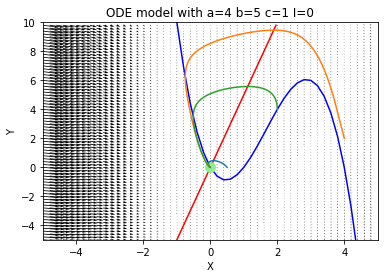

In [102]:
fn([-5,5],[-5,10],dy,dx,a,b,c,I,10,0.01,[1,0.5, 1],[0.5,3, 1.5])

3.3. Use the same code as above, and the same values of parameters $a,b,c$, increase the value of applied current $I$ until you observe oscillations. Make a plot of the resulting phase plane and solutions
       

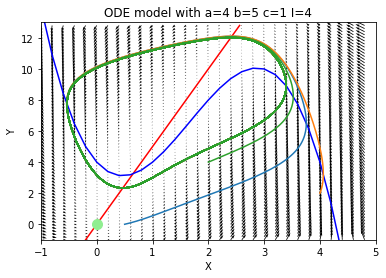

In [103]:
a=4
b=5
c=1
I=4

xmin = -1 #change the parameters here to control the range of the axes
xmax = 5
ymin = -1
ymax = 13

fn([-1,5],[-1,13],dy,dx,a,b,c,I,10,0.01,[1, 0.5, 1],[0.5,3, 1.5])


### 3.4 

Use the Jacobian function from quesion 1 to calculate the eigenvalues of the fixed point for one value of $I$ below the oscillation threshold and one value above, and compare their classification. Note that for $I>0$ it is very hard to calculate the fixed point by hand, so please create a nullcline function and use the numeric solver `fsolve` as shown in the code example notebook.

In [104]:
# set the model parameters
a=4
b=5
c=1
I=0

# define the fixed point vectors
Xfp = [0]
Yfp = [0]

# for loop to iterate over the number of fixed points
for i in np.arange(len(Xfp)):
    Jac = ODE_jac3([Xfp[i], Yfp[i]], a, b,c,d)
    eVals, eVecs = np.linalg.eig(Jac)
    print("Fixed point ("+str(Xfp[i])+', '+str(Yfp[i])+") eigenvalues:"+str((eVals)))
    

Fixed point (0, 0) eigenvalues:[-2.5+1.6583124j -2.5-1.6583124j]


The fixed point is a stable spiral.

In [105]:
# set the model parameters
a=4
b=5
c=1
I=4

def null_func(x, a, b,c,I):
    return [c*x[1]/b -x[0], # equation for the first nullcline
            x[0]*(a-x[0])*(x[0]-1)+I-x[1]] # equation for the second nullcline

root = fsolve(null_func, x0=[1,1], args= (a,b,c,I))
print("Numeric solution for fixed point:", root)

# define the fixed point vectors
Xfp = [root[0]]
Yfp = [root[1]]

# for loop to iterate over the number of fixed points
for i in np.arange(len(Xfp)):
    Jac = ODE_jac3([Xfp[i], Yfp[i]], a, b,c,d)
    eVals, eVecs = np.linalg.eig(Jac)
    print("Fixed point ("+str(Xfp[i])+', '+str(Yfp[i])+") eigenvalues:"+str((eVals)))
    

Numeric solution for fixed point: [0.64679004 3.23395018]
Fixed point (0.6467900358006756, 3.233950179003378) eigenvalues:[-1.83392595+2.07474517j -1.83392595-2.07474517j]


The fixed point is a stable spiral.